<a href="https://colab.research.google.com/github/sberniz/FlyingvsDriving/blob/master/Plane_vs_Driving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Library Imports 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [42]:
#load plane crash data worldwide
plane_crash = pd.read_csv('https://raw.githubusercontent.com/sberniz/FlyingvsDriving/master/data/plane_crash_2019.csv')
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [43]:
plane_crash['Date'] = pd.to_datetime(plane_crash['Date'],infer_datetime_format=True)
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [44]:
plane_crash['year'] = plane_crash['Date'].dt.year
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,1913


In [45]:
condition = (plane_crash['year'] >= 1970) &  (plane_crash['year'] <= 2017)
plane_crash_1970_2017 = plane_crash[condition]
print(plane_crash_1970_2017.shape)
plane_crash_1970_2017.head()


(2507, 18)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year
2435,1970-01-05,22:25,"Stockholm, Sweden",Spantax,NaN,Stockholm - Zurich,Convair CV-990-30A-5,EC-BNM,30-10-32,10.0,7.0,3.0,5.0,5.0,0.0,0.0,The plane developed trouble in the No. 4 engin...,1970
2436,1970-01-12,12:00,Near Villia Greece,Military - Royal Hellenic Air Force,NaN,Military exercise,Douglas C-47,NaN,NaN,27.0,22.0,5.0,23.0,19.0,4.0,0.0,"The aircraft, carrying paratroopers, crashed i...",1970
2437,1970-01-13,06:00,"Faleolo, Western Samoa",Polynesian Airlines,208B,"Apia, Western Samoa - Pago Pago, American Samoa",Douglas DC-3,5W-FAC,16964,32.0,29.0,3.0,32.0,29.0,3.0,0.0,Crashed into a lagoon 400 yards past the end o...,1970
2438,1970-01-14,NaN,"Mt. Pumacona, Peru",Faucett,NaN,Trujillo - Juanjui,Douglas DC-4,OB-R-776,10591,28.0,24.0,4.0,28.0,24.0,4.0,0.0,"Flew into a 10,500 ft. mountain. The mental st...",1970
2439,1970-01-25,19:13,"Near Delhi, India",Royal Nepal Airlines,NaN,Kathmandu - Delhi,Fokker F-27 Friendship 200,9N-AAR,1965,23.0,18.0,5.0,1.0,0.0,1.0,0.0,The aircraft crashed short of the runway after...,1970


In [56]:
plane_crash_1970_2017['Operator'].value_counts().sort_values()

Ruiban & Duran Compania Aérea      1
Sarit Airlines                     1
Permaviatrans                      1
Itek Air                           1
Air Caraibes                       1
                                ... 
Military - U.S. Army              15
Merpati Nusantara Airlines        18
Private                           21
Military - U.S. Air Force         54
Aeroflot                         142
Name: Operator, Length: 1547, dtype: int64

In [95]:
plane_crash_1970_2017 = plane_crash_1970_2017[((plane_crash_1970_2017['Operator'].str.contains('Military',na=False,regex=True)) == False) & ((plane_crash_1970_2017['Route'].str.contains('Airshow',na=False,regex=True)) == False)]
print(plane_crash_1970_2017.shape)
plane_crash_1970_2017.head()

(2125, 19)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
2435,1970-01-05,22:25,"Stockholm, Sweden",Spantax,NaN,Stockholm - Zurich,Convair CV-990-30A-5,EC-BNM,30-10-32,10.0,7.0,3.0,5.0,5.0,0.0,0.0,The plane developed trouble in the No. 4 engin...,1970,50.000000
2437,1970-01-13,06:00,"Faleolo, Western Samoa",Polynesian Airlines,208B,"Apia, Western Samoa - Pago Pago, American Samoa",Douglas DC-3,5W-FAC,16964,32.0,29.0,3.0,32.0,29.0,3.0,0.0,Crashed into a lagoon 400 yards past the end o...,1970,100.000000
2438,1970-01-14,NaN,"Mt. Pumacona, Peru",Faucett,NaN,Trujillo - Juanjui,Douglas DC-4,OB-R-776,10591,28.0,24.0,4.0,28.0,24.0,4.0,0.0,"Flew into a 10,500 ft. mountain. The mental st...",1970,100.000000
2439,1970-01-25,19:13,"Near Delhi, India",Royal Nepal Airlines,NaN,Kathmandu - Delhi,Fokker F-27 Friendship 200,9N-AAR,1965,23.0,18.0,5.0,1.0,0.0,1.0,0.0,The aircraft crashed short of the runway after...,1970,4.347826
2440,1970-01-25,NaN,"Near Poza Rica, Mexico",Charter -Federal Electricity Commission,NaN,Mexico City - Poza Rica,Convair CV-240-2,XB-DOK,071,19.0,15.0,4.0,18.0,14.0,4.0,0.0,Crashed into Vega Hill located six km east of ...,1970,94.736842


In [102]:
plane_crash_1970_2017['percentage fatalities'] = (plane_crash_1970_2017['Fatalities']  / plane_crash_1970_2017['Aboard'])*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
plane_crash_1970_2017.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
2435,1970-01-05,22:25,"Stockholm, Sweden",Spantax,NaN,Stockholm - Zurich,Convair CV-990-30A-5,EC-BNM,30-10-32,10.0,7.0,3.0,5.0,5.0,0.0,0.0,The plane developed trouble in the No. 4 engin...,1970,50.000000
2437,1970-01-13,06:00,"Faleolo, Western Samoa",Polynesian Airlines,208B,"Apia, Western Samoa - Pago Pago, American Samoa",Douglas DC-3,5W-FAC,16964,32.0,29.0,3.0,32.0,29.0,3.0,0.0,Crashed into a lagoon 400 yards past the end o...,1970,100.000000
2438,1970-01-14,NaN,"Mt. Pumacona, Peru",Faucett,NaN,Trujillo - Juanjui,Douglas DC-4,OB-R-776,10591,28.0,24.0,4.0,28.0,24.0,4.0,0.0,"Flew into a 10,500 ft. mountain. The mental st...",1970,100.000000
2439,1970-01-25,19:13,"Near Delhi, India",Royal Nepal Airlines,NaN,Kathmandu - Delhi,Fokker F-27 Friendship 200,9N-AAR,1965,23.0,18.0,5.0,1.0,0.0,1.0,0.0,The aircraft crashed short of the runway after...,1970,4.347826
2440,1970-01-25,NaN,"Near Poza Rica, Mexico",Charter -Federal Electricity Commission,NaN,Mexico City - Poza Rica,Convair CV-240-2,XB-DOK,071,19.0,15.0,4.0,18.0,14.0,4.0,0.0,Crashed into Vega Hill located six km east of ...,1970,94.736842


In [104]:
plane_crash_total_fatalities = plane_crash_1970_2017[plane_crash_1970_2017['percentage fatalities'] == 100]
print(plane_crash_total_fatalities.shape)
plane_crash_total_fatalities.head()

(1259, 19)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
2437,1970-01-13,06:00,"Faleolo, Western Samoa",Polynesian Airlines,208B,"Apia, Western Samoa - Pago Pago, American Samoa",Douglas DC-3,5W-FAC,16964,32.0,29.0,3.0,32.0,29.0,3.0,0.0,Crashed into a lagoon 400 yards past the end o...,1970,100.0
2438,1970-01-14,NaN,"Mt. Pumacona, Peru",Faucett,NaN,Trujillo - Juanjui,Douglas DC-4,OB-R-776,10591,28.0,24.0,4.0,28.0,24.0,4.0,0.0,"Flew into a 10,500 ft. mountain. The mental st...",1970,100.0
2441,1970-01-28,20:53,"Near Batagai, Russia",Aeroflot,NaN,Chokurdakh - Batagay,Antonov AN-24,CCCP-47701,59900202,34.0,28.0,6.0,34.0,28.0,6.0,0.0,Crashed into a mountain while on approach afte...,1970,100.0
2442,1970-01-28,07:49,"Cleveland, Ohio",TAG Airlines,NaN,Cleveland - Detroit,De Havilland Dove,N2300H,04444,9.0,7.0,2.0,9.0,7.0,2.0,0.0,The aircraft suffered an airframe failure whil...,1970,100.0
2443,1970-01-29,19:27,"Near Murmansk, Russia",Aeroflot,145,Leningrad - Murmansk,Tupolev TU-124,CCCP-45083,5351706,11.0,32.0,6.0,11.0,8.0,3.0,0.0,Collided with a snow-covered rocky mountain sl...,1970,100.0


In [165]:
plane_crash_1970_2017[plane_crash_1970_2017['Ground'] > 0]

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
2448,1970-02-12,07:38,"Puerto Infrida, Colombia",Lineas Aéreas La Urraca,NaN,Villavicencio - Puerto Inírida,Douglas DC-3 (C-47-DL),HK-1270,4544,12.0,8.0,4.0,12.0,8.0,4.0,2.0,Crashed while attempting to return to the airp...,1970,100.000000
2469,1970-05-30,09:30,"Chamblee, Georgia",Lehigh Acres Development Inc.,701,"Chamblee, GA - Fort Myers,FL",Martin 404,N40412,14116,33.0,29.0,4.0,1.0,1.0,0.0,5.0,There was a loss of power as the aircraft clim...,1970,3.030303
2480,1970-08-09,15:00,"Near Cuzco, Peru",Lineas Aereas Nacionales SA (Peru),502,Cuzco - Lima,Lockheed 188A Electra,OB-R939,1106,100.0,91.0,9.0,99.0,91.0,8.0,2.0,The flight crashed shortly after takeoff after...,1970,99.000000
2575,1972-03-03,20:48,"Albany, New York",Mohawk Airlines,405,"New York City - Albany, NY",Fairchild-Hiller FH-227-B,N7818M,541,48.0,45.0,3.0,16.0,14.0,2.0,1.0,The aircraft was on final approach to Albany C...,1972,33.333333
2598,1972-06-14,20:20,"Near New Delhi, India",Japan Air Lines,471,Bangkok - Delhi,McDonnell Douglas DC-8-53,JA8012,45860/213,87.0,76.0,11.0,82.0,72.0,10.0,4.0,The aircraft crashed short of the runway. Indi...,1972,94.252874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,2012-11-30,17:50,"Near Brazzaville, Congo",Aero Service,NaN,Pointe Noire - Brazzaville,Ilysushin Il-76T,EK-76300,083410300,7.0,0.0,7.0,7.0,0.0,7.0,25.0,The cargo plane crashed into a dozen houses in...,2012,100.000000
4836,2012-12-25,08:50,"Heho, Myanmar",Air Bagan,W9-011,Mandalay - Heho,Fokker 100,XY-AGC,11327,71.0,65.0,6.0,1.0,0.0,1.0,1.0,The passenger plane crash in a field two miles...,2012,1.408451
4859,2013-11-29,20:25,Glasgow Scotland,Bond Air Services Ltd.,NaN,NaN,Eurocopter EC135 T2,G-SPAO,0546,3.0,2.0,1.0,3.0,2.0,1.0,5.0,The police helicopter crashed into the roof of...,2013,100.000000
4918,2016-08-05,12:38,"Dubai, United Arab Emirates",Emirates,521,"Thiruvanthapuram, India - Dubai, UAE",Boeing 777-31H,A6-EMW,32700/434,300.0,282.0,18.0,0.0,0.0,0.0,1.0,"After being cleared to land, the crew informed...",2016,0.000000


In [162]:
plane_crash_1970_2017['Aboard'].sum() + plane_crash_1970_2017['Ground'].sum()

95903.0

In [164]:
plane_crash_1970_2017.shape

(2125, 19)

In [105]:
total_fat = plane_crash_total_fatalities.shape[0]
total_cras = plane_crash_1970_2017.shape[0]
total_fat /total_cras

0.5924705882352941

In [107]:
plane_crash_1970_2017.isnull().sum()

Date                        0
Time                      471
Location                    1
Operator                    1
Flight #                 1341
Route                     180
AC Type                     1
Registration               25
cn/ln                      98
Aboard                      2
Aboard Passangers          35
Aboard Crew                36
Fatalities                  0
Fatalities Passangers      37
Fatalities Crew            38
Ground                      3
Summary                    11
year                        0
percentage fatalities       2
dtype: int64

In [106]:
plane_crash_1970_2017['Fatalities'].sum()

58107.0

In [108]:
total = 0 
for item in plane_crash_1970_2017['Fatalities']:
  total += item
total_crash = plane_crash_1970_2017.shape[0]
total / total_crash
#print(total)

27.344470588235293

In [115]:
plane_crash_1970_2017.isnull().sum()

Date                        0
Time                      471
Location                    1
Operator                    1
Flight #                 1341
Route                     180
AC Type                     1
Registration               25
cn/ln                      98
Aboard                      2
Aboard Passangers          35
Aboard Crew                36
Fatalities                  0
Fatalities Passangers      37
Fatalities Crew            38
Ground                      3
Summary                    11
year                        0
percentage fatalities       2
dtype: int64

In [116]:
plane_crash_1970_2017.tail().sort_index()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
4937,2017-10-12,17:15,"Near Cuílo, Angola",Guicango,NaN,Dundo - Luanda,Embraer EMB-120ER,D2-FDO,120082,7.0,4.0,3.0,7.0,4.0,3.0,0.0,The air ambulance crashed en route shortly aft...,2017,100.0
4938,2017-10-14,08:30,"Abidjan, Ivory Coast",Valan International Cargo Charter,NaN,Burkina Faso - Abidjan,Antonov AN-26-100,ER-AVB,3204,10.0,4.0,6.0,4.0,4.0,0.0,0.0,"The cargo plane, carrying French military carg...",2017,40.0
4939,2017-11-15,08:00,"Empakaai, Tanzania",Costal Aviation,NaN,Arusha - Serengeti,Cessna 208B Grand Caravan,5H-EGG,208B-0476,11.0,10.0,1.0,11.0,10.0,1.0,0.0,The chartered Cessna was flying tourists from ...,2017,100.0
4940,2017-12-13,18:15,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,NaN,Fond-du-Lac - Stony Rapids,ATR42-320,C-GWEA,240,25.0,22.0,3.0,1.0,1.0,0.0,0.0,"Shortly after taking off, the aircraft lost al...",2017,4.0
4941,2017-12-31,12:16,"Punta Islita, Costa Rica",Naure Air,NaN,Punta Islita - San Jose,Cessna 208B Grand Caravan,TI-BEI,208B-0900,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The passenger plane crashed 10 minutes after t...,2017,100.0


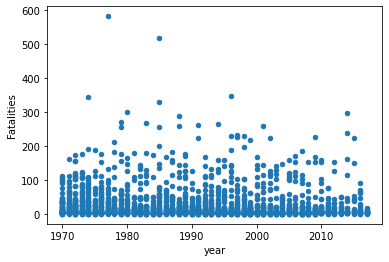

In [109]:
plane_crash_1970_2017.plot.scatter('year','Fatalities');

In [117]:
plane_crash_1970_2017.dtypes

Date                     datetime64[ns]
Time                             object
Location                         object
Operator                         object
Flight #                         object
Route                            object
AC Type                          object
Registration                     object
cn/ln                            object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
year                              int64
percentage fatalities           float64
dtype: object

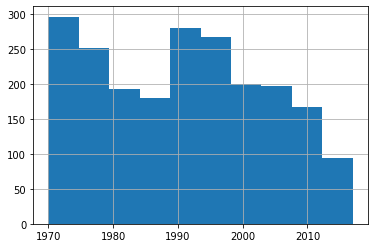

In [111]:
plane_crash_1970_2017['year'].hist();

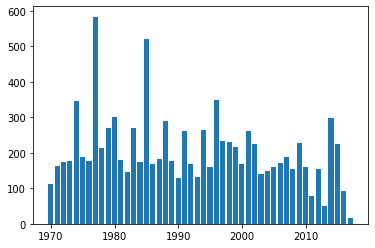

In [113]:
fig, ax = plt.subplots()
ax.bar(x=plane_crash_1970_2017['year'], height=plane_crash_1970_2017['Fatalities'])
plt.show()

In [6]:
car_accidents = pd.read_csv('https://raw.githubusercontent.com/sberniz/FlyingvsDriving/master/data/auto_data_2017.csv')

In [8]:
print(car_accidents.shape)
car_accidents.head().sort_values('TIME')

(8976, 8)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,DEATH,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,DEATH,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,DEATH,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,DEATH,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,DEATH,NBR,A,1974,557.0,NaN


In [ ]:
car_accidents['SUBJECT'].value_counts().sort_index()

ACCIDENTCASUAL    2287
DEATH             4403
INJURE            2286
Name: SUBJECT, dtype: int64

In [ ]:
car_accidents['SUBJECT'].value_counts().sort_index()[1]
death_total = car_accidents['SUBJECT'].value_counts().sort_index()[1]
total_acc = car_accidents.shape[0]
total_acc
death_total / total_acc

0.49053030303030304

In [ ]:
car_accidents_death['date'] = car_accidents_death['TIME'].

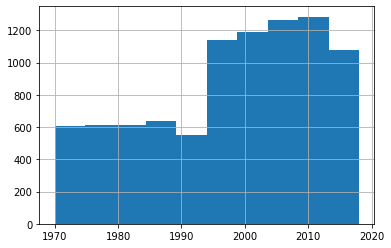

In [118]:
car_accidents['TIME'].hist()

In [120]:
car_accidents[car_accidents['SUBJECT'] == 'DEATH']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,DEATH,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,DEATH,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,DEATH,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,DEATH,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,DEATH,NBR,A,1974,557.0,NaN
...,...,...,...,...,...,...,...,...
8924,CHL,ROADACCID,DEATH,NBR,A,2014,2116.4,NaN
8925,CHL,ROADACCID,DEATH,NBR,A,2015,2135.9,NaN
8926,CHL,ROADACCID,DEATH,NBR,A,2016,2177.5,NaN
8927,CHL,ROADACCID,DEATH,NBR,A,2017,1925.3,NaN


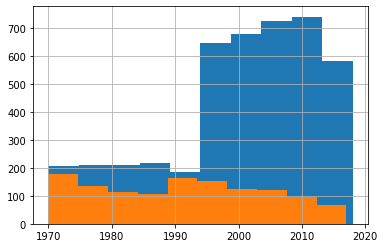

In [182]:
car_accidents_death['TIME'].hist()
plane_crash_total_fatalities['year'].hist()
plt.show()

In [141]:
car_accidents_death = car_accidents[car_accidents['SUBJECT'] == 'DEATH']
car_accidents_death.head().sort_values('TIME')

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,DEATH,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,DEATH,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,DEATH,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,DEATH,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,DEATH,NBR,A,1974,557.0,NaN


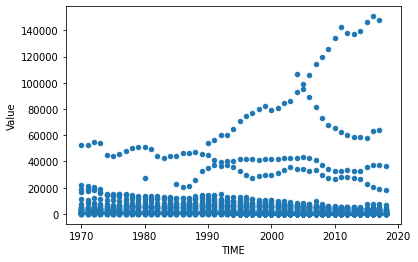

In [143]:
car_accidents_death.plot.scatter('TIME','Value')

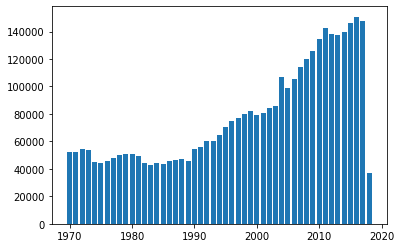

In [151]:
fig, ax = plt.subplots()
ax.bar(x=car_accidents_death['TIME'], height=car_accidents_death['Value'])
plt.show() #Values = death per 1M habitants. 

In [134]:
car_accidents.isnull().sum()

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            1
Flag Codes    8737
dtype: int64

In [155]:
total_death_car = car_accidents_death['Value'].sum()
total_car_accidents  = car_accidents['Value'].sum()
total_death_car / total_car_accidents

0.02497675807275644

In [ ]:
jcar_year = np.array([car_accidents_death['TIME']])
jcar_year

array([[1970, 1971, 1972, ..., 2016, 2017, 2018]])

In [ ]:
car_accidents.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes     object
dtype: object

In [166]:
stats.ttest_ind(car_accidents_death['Value'],plane_crash_1970_2017['Fatalities'],nan_policy='omit')

Ttest_indResult(statistic=12.02814186379866, pvalue=5.6327784282833145e-33)

In [170]:
print(car_accidents_death['Value'].sum())
print(plane_crash_1970_2017['Fatalities'].sum())

12424822.30881528
58107.0


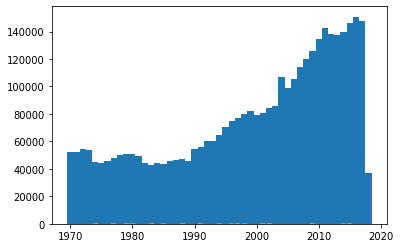

In [178]:
fig, ax = plt.subplots()
ax.bar(x=car_accidents_death['TIME'], height=car_accidents_death['Value'],width=1,)
ax.bar(x=plane_crash_1970_2017['year'],height=plane_crash_1970_2017['Fatalities'],width=.8)

plt.show()

In [156]:
car_accidents['Value'].mean()

55426.7816388652

In [ ]:
condition = car_accidents['SUBJECT'] == 'DEATH'
car_accidents[condition]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,DEATH,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,DEATH,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,DEATH,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,DEATH,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,DEATH,NBR,A,1974,557.0,NaN
...,...,...,...,...,...,...,...,...
8924,CHL,ROADACCID,DEATH,NBR,A,2014,2116.4,NaN
8925,CHL,ROADACCID,DEATH,NBR,A,2015,2135.9,NaN
8926,CHL,ROADACCID,DEATH,NBR,A,2016,2177.5,NaN
8927,CHL,ROADACCID,DEATH,NBR,A,2017,1925.3,NaN


In [ ]:
car_accidents_death.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,1,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,1,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,1,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,1,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,1,NBR,A,1974,557.0,NaN


In [ ]:
car_accidents_death.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,SVN,ROADACCID,1,NBR,A,1970,620.0,NaN
1,SVN,ROADACCID,1,NBR,A,1971,644.0,NaN
2,SVN,ROADACCID,1,NBR,A,1972,625.0,NaN
3,SVN,ROADACCID,1,NBR,A,1973,701.0,NaN
4,SVN,ROADACCID,1,NBR,A,1974,557.0,NaN
